In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.rcParams.update({'font.size': 16}) # set font size

In [39]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv', index_col='date', parse_dates=['date'])

In [40]:
# Clean data
df_clean = df[(df['value'] > df['value'].quantile(0.025)) |
             (df['value'] < df['value'].quantile(0.025))]

In [41]:
def draw_line_plot():
    # Draw line plot
    fig, ax = plt.subplots(figsize=(30,10))

    dates = df_clean.index
    page_views = df_clean['value']
    
    plt.ylim(20000, 180000)
    
    #TODO: Format graph to look like Figure_1.png
    # Set y-valueange [0, 200000, 20000]
    # Set x-value ticks [2016-07, 2017-01, 2017-07, 2018-01, 2018-07, 2019-01, 2019-07, 2020-01]
    
    ax.plot(dates, page_views, color='#d62728')
    
    ax.set_xlabel("Date")
    ax.set_ylabel("Page Views")
    ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")

    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

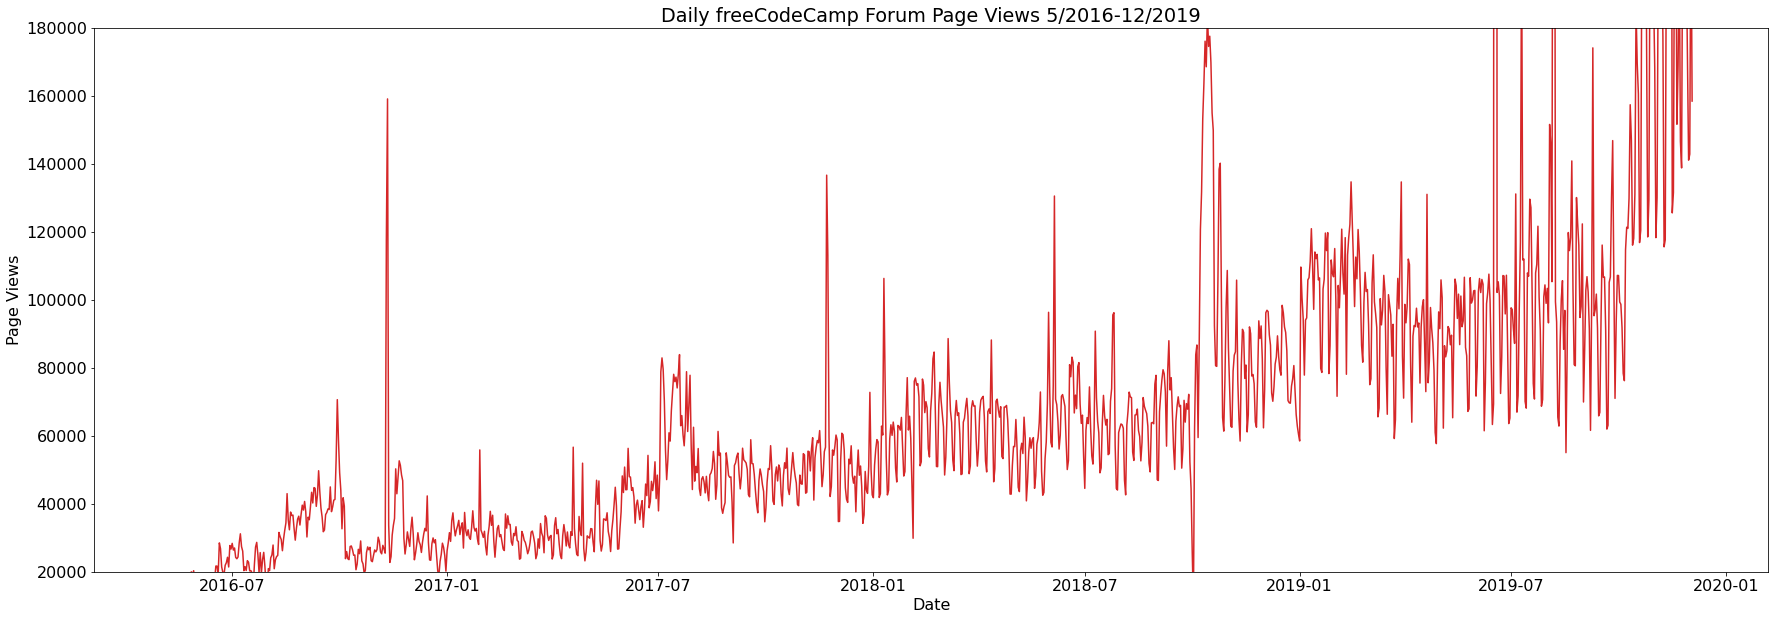

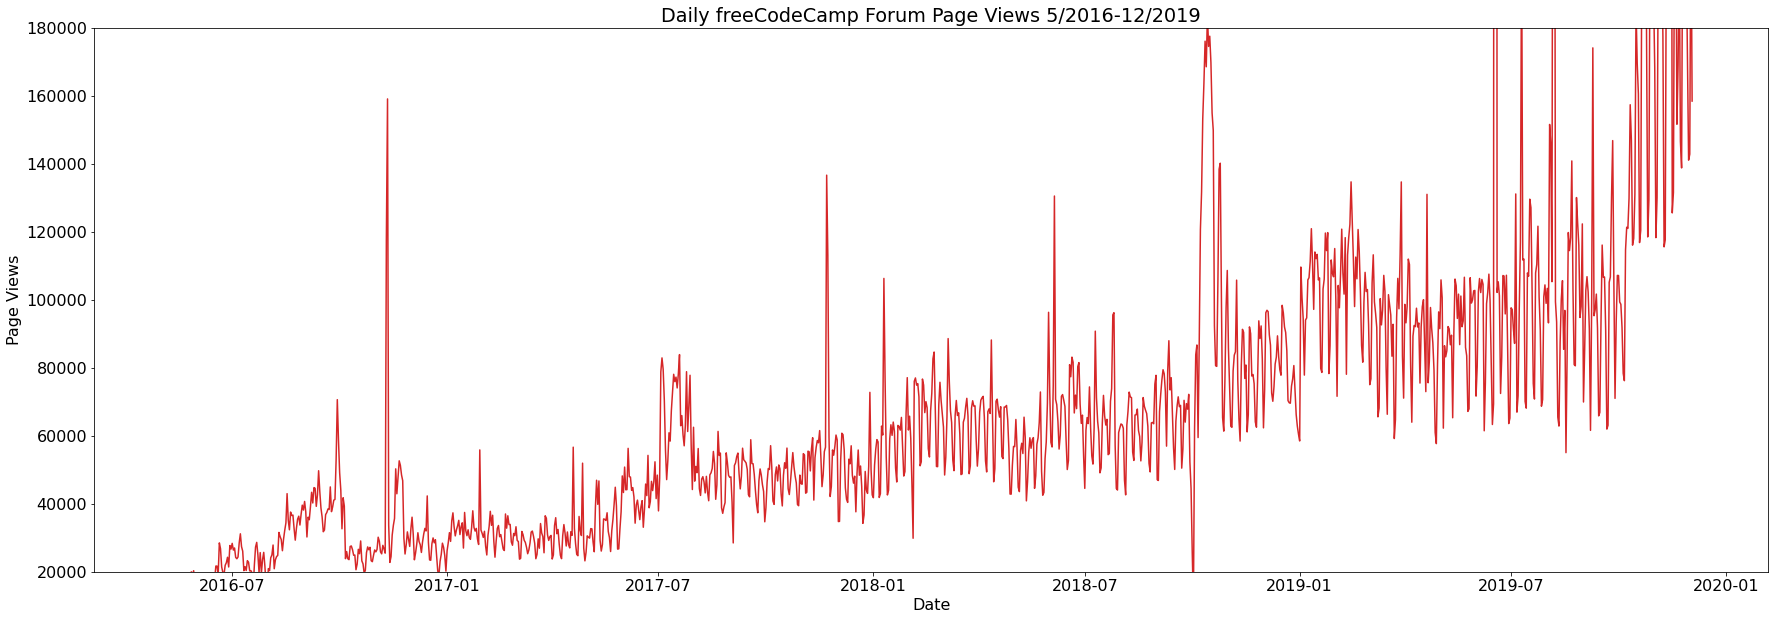

In [42]:
draw_line_plot()

In [43]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()
    df_bar['month'] = df_bar.index.month
    df_bar['year'] = df_bar.index.year
    df_bar_grouped = df_bar.groupby(["year","month"])["value"].mean().unstack()
    
    months = ['January', 'Feburary', 'March', 'April', 'May', 'June', 'July',
              'August', 'September', 'October', 'November', 'December']

    # Draw bar plot
    axes = df_bar_grouped.plot.bar(figsize=(16,8))
    axes.set_xlabel("Years")
    axes.set_ylabel("Average Page Views")
    axes.legend(labels=months, title='Months')
    fig = axes.get_figure()

    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

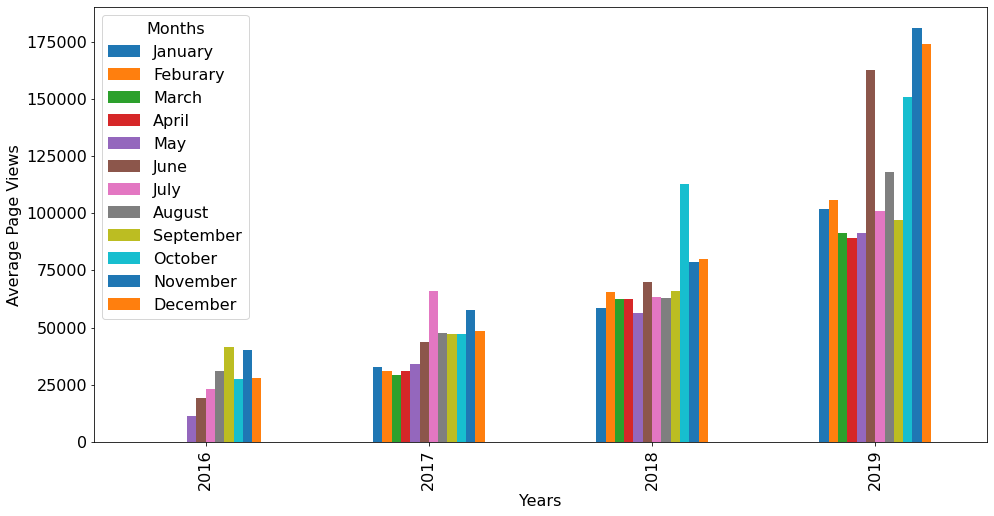

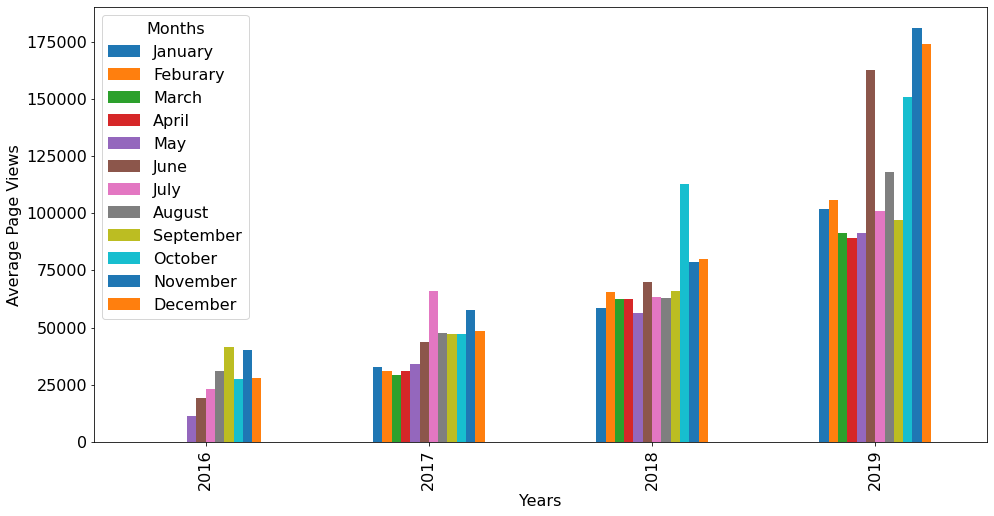

In [44]:
draw_bar_plot()

In [ ]:
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)





    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig